# Breast Cancer Detection

## 1. Project Description:
- Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society. The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients.
- Detecting breast cancer through machine learning models such as **LogisticRegression, KNeighborsClassifier and SVC...**

## 2. Datasets:

Source: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

## 3. Exploring Datasets:
- The dataset has all numeric features(int values).
- The dataset also contain only one value range from 0-10 for all features.
- There are 16 missing values denoting as '?' at 'bare_nuclei' feature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load dataset

path = 'datasets/breast-cancer-wisconsin.data'

column_name = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
               'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
               'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv(path, names = column_name)

df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Dataset shape

df.shape

(699, 11)

In [4]:
# Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
uniform_cell_size         699 non-null int64
uniform_cell_shape        699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
# Dataset description

df.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
# Check null

df.isnull().sum().sum()

0

In [7]:
# Check "?" denote for missing values

df[df == '?'].count().sum()

C:\Users\kevin\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


16

In [8]:
df[df == '?'].count()

id                         0
clump_thickness            0
uniform_cell_size          0
uniform_cell_shape         0
marginal_adhesion          0
single_epithelial_size     0
bare_nuclei               16
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64

In [9]:
# Check "9999" denoting for missing values

df[df == 9999].count().sum()

0

In [10]:
# Check "-9999" denoting for missing values

df[df == -9999].count().sum()

0

## 4. Drop 'id' feature:

In [11]:
df.drop(['id'], axis = 1, inplace = True)

## 5. Handling the missing values:¶
There are 16 missing values over 699 total values at 'bare_nuclei' feature. Therefore, the rows containing the missing values will be drop out our datasets.

In [12]:
# Drop '? 'missing values 
df = df[df['bare_nuclei'] != '?']

In [13]:
# Check

df[df == '?'].count()

clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [14]:
# Dataset after dropping missing values

df.shape

(683, 10)

## 6. Convert object data type of 'bare_nuclei' feature to int data type 

In [15]:
df['bare_nuclei'] = df['bare_nuclei'].astype(int) 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness           683 non-null int64
uniform_cell_size         683 non-null int64
uniform_cell_shape        683 non-null int64
marginal_adhesion         683 non-null int64
single_epithelial_size    683 non-null int64
bare_nuclei               683 non-null int32
bland_chromatin           683 non-null int64
normal_nucleoli           683 non-null int64
mitoses                   683 non-null int64
class                     683 non-null int64
dtypes: int32(1), int64(9)
memory usage: 56.0 KB


## 7. Data visualization: 
- Number clients in benign group is ***444***. 
- Number clients in malignant group is ***239***.
- Histogram for **clump thicknessis** is well distributed.  
- Histogram for others is left skewed.

In [17]:
# Class: (2 for benign, 4 for malignant)

# Counting number clients in '2' benign group
benign_num = df[df['class'] == 2]['class'].count()
print(f'Number clients in benign group {benign_num}')


# Counting number clients in '2' malignant group
malignant_num = df[df['class'] == 4]['class'].count()
print(f'Number clients in malignant group {malignant_num}')
           

Number clients in benign group 444
Number clients in malignant group 239


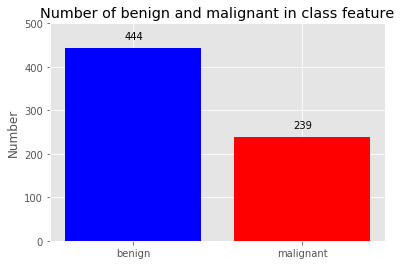

In [18]:
plt.style.use('ggplot')
# Plot bar chart for number of benign and malignant in 'class' feature:

labels = ['benign', 'malignant']
height = [benign_num, malignant_num]

x = np.arange(len(labels))  # the label locations
plt.bar(x = x, height = height, align='center', color = ['b', 'r'])
plt.xticks(x, labels)
plt.ylabel('Number')
plt.title('Number of benign and malignant in class feature')

plt.ylim(0,500)
plt.annotate(benign_num, xy = (x[0], benign_num), xytext = (x[0] - 0.05, benign_num+20))
plt.annotate(malignant_num , xy = (x[1], malignant_num), xytext = (x[1] - 0.05, malignant_num+20))
plt.show()

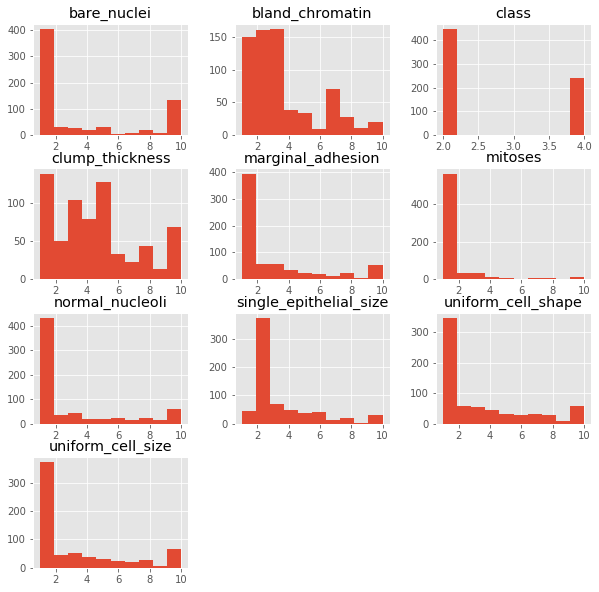

In [19]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

## 8. Splitting the dataset into train and test sets

In [20]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## 9. Making predictions and evaluating performance
- We will now evaluate our model on the test set with respect to classification accuracy. But we will also take a look the model's confusion matrix.

- In the case of predicting breast cancer. **it is more important to see if our machine learning model is able to correctly predict the 'malignant' group.**
- **LogisticRegression** model:
    - False to predict maligrant is **8.62%**
    - True to predict maligrant is **91.38%**
    - Best Accuracy: **96.7%** using {'logreg__max_iter': 100, 'logreg__tol': 0.01}
- **SVC** model: 
    - False to predict maligrant is **1.72%**
    - True to predict maligrant is **98.28%**
    - Best Accuracy: **95.6%** using {'SVM__C': 1}
- **KNN** model:
    - False to predict maligrant is **8.62%**
    - True to predict maligrant is **91.38%**
    - Best: **96.7%** using {'KNN__n_neighbors': 7}

## 10. LogisticRegression model: grid searching and making the model perform better

In [21]:
# Setup the pipeline
steps = [('logreg', LogisticRegression(solver='lbfgs'))]

pipeline = Pipeline(steps)

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = {'logreg__tol': tol, 'logreg__max_iter': max_iter}

## 11. LogisticRegression model: finding the best performing model

In [22]:
# Instantiate GridSearchCV with the required parameters
logreg_model = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Fit data to grid_model
logreg_model_result = logreg_model.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_logreg = logreg_model_result.predict(X_test)

# Summarize results
best_score, best_params = logreg_model_result.best_score_, logreg_model_result.best_params_

print(f"Best: {round(best_score*100,2)}% using {best_params}")

Best: 96.7% using {'logreg__max_iter': 100, 'logreg__tol': 0.01}


In [23]:
# Print the confusion matrix of the logreg model
print('=======================================')
print('Confusion matrix')
cm =confusion_matrix(y_test, y_pred_logreg)  
index = ['benign', 'malignant']  
columns = ['benign', 'malignant']  
cm_df = pd.DataFrame(cm,columns,index) 
cm_df

Confusion matrix


,benign,malignant
benign,78,1
malignant,5,53


In [24]:
false_malignant_rate = cm_df['benign']['malignant'] / (cm_df['malignant']['malignant'] + cm_df['benign']['malignant'])
print(f'False to predict maligrant is {round(false_malignant_rate*100,2)}%')

true_malignant_rate = cm_df['malignant']['malignant'] / (cm_df['malignant']['malignant'] + cm_df['benign']['malignant'])
print(f'True to predict maligrant is {round(true_malignant_rate*100,2)}%')

False to predict maligrant is 8.62%
True to predict maligrant is 91.38%


## 12. SVM model: grid searching and making the model perform better

In [25]:
# Setup the pipeline
steps = [('SVM', SVC(gamma = 'auto'))]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100]}

## 13. SVM model: finding the best performing model

In [26]:
# Instantiate the GridSearchCV object: cv
svm_model_grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit to the training set
svm_model_result = svm_model_grid.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_svm = svm_model_result.predict(X_test)

In [27]:
# Summarize results
best_score, best_params = svm_model_result.best_score_, svm_model_result.best_params_

print(f"Best: {round(best_score*100,2)}% using {best_params}")

Best: 95.6% using {'SVM__C': 1}


In [28]:
# Print the confusion matrix of the logreg model
print('=======================================')
print('Confusion matrix')
cm =confusion_matrix(y_test, y_pred_svm)  
index = ['benign', 'malignant']  
columns = ['benign', 'malignant']  
cm_df = pd.DataFrame(cm,columns,index) 
cm_df

Confusion matrix


,benign,malignant
benign,74,5
malignant,1,57


In [29]:
false_malignant_rate = cm_df['benign']['malignant'] / (cm_df['malignant']['malignant'] + cm_df['benign']['malignant'])
print(f'False to predict maligrant is {round(false_malignant_rate*100,2)}%')

true_malignant_rate = cm_df['malignant']['malignant'] / (cm_df['malignant']['malignant'] + cm_df['benign']['malignant'])
print(f'True to predict maligrant is {round(true_malignant_rate*100,2)}%')

False to predict maligrant is 1.72%
True to predict maligrant is 98.28%


## 14. KNeighborsClassifier model: finding the best performing model

In [30]:
# Setup the pipeline
steps = [('KNN', KNeighborsClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'KNN__n_neighbors':np.arange(1, 11)}

## 15. KNN model: finding the best performing model

In [31]:
# Instantiate the GridSearchCV object: cv
knn_model_grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit to the training set
knn_model_result = knn_model_grid.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_knn = knn_model_result.predict(X_test)

In [32]:
# Summarize results
best_score, best_params = knn_model_result.best_score_, knn_model_result.best_params_

print(f"Best: {round(best_score*100,2)}% using {best_params}")

Best: 96.7% using {'KNN__n_neighbors': 7}


In [33]:
# Print the confusion matrix of the logreg model
print('=======================================')
print('Confusion matrix')
cm =confusion_matrix(y_test, y_pred_knn)  
index = ['benign', 'malignant']  
columns = ['benign', 'malignant']  
cm_df = pd.DataFrame(cm,columns,index) 
cm_df

Confusion matrix


,benign,malignant
benign,78,1
malignant,5,53


In [34]:
false_malignant_rate = cm_df['benign']['malignant'] / (cm_df['malignant']['malignant'] + cm_df['benign']['malignant'])
print(f'False to predict maligrant is {round(false_malignant_rate*100,2)}%')

true_malignant_rate = cm_df['malignant']['malignant'] / (cm_df['malignant']['malignant'] + cm_df['benign']['malignant'])
print(f'True to predict maligrant is {round(true_malignant_rate*100,2)}%')

False to predict maligrant is 8.62%
True to predict maligrant is 91.38%
